In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


## Questions to answer:
- Does the dataset include any missing values?
- How many tuples are there in the dataset?
- How many tournaments are there in the dataset?

In [7]:
nr_nans = df.isna().sum()
nr_tuples = len(df)
nr_tournaments = len(df.tournament.unique())
print("Nr. NaN: ", nr_nans)
print("Nr. Tuples: ", nr_tuples)
print("Nr. Tournaments: ", nr_tournaments)

Nr. NaN:  date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
Nr. Tuples:  42650
Nr. Tournaments:  120


## Convert date to datetime format

In [10]:
df['date']= pd.to_datetime(df['date'])
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [14]:
home_nr_win = df.home_score[df.home_score > df.away_score].count()
home_nr_tie = df.home_score[df.home_score == df.away_score].count()
home_nr_loss = df.home_score[df.home_score < df.away_score].count()
print("Nr. Home Wins: ", home_nr_win)
print("Nr. Home Ties: ", home_nr_tie)
print("Nr. Home Losses: ", home_nr_loss)

Nr. Home Wins:  20739
Nr. Home Ties:  9837
Nr. Home Losses:  12074


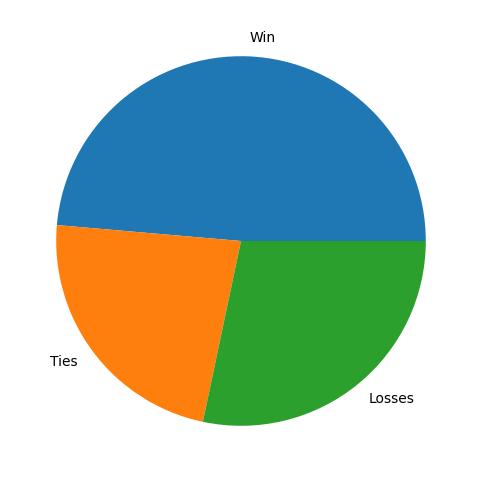

In [17]:
labels = ['Win', 'Ties', 'Losses']
sizes = [home_nr_win, home_nr_tie, home_nr_loss]

plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels);

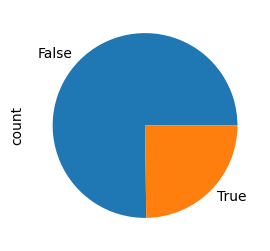

In [57]:
df.neutral.value_counts().plot(kind='pie', figsize=(10,3));